In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy


Data = pd.read_csv("reddit_train.csv",sep=",",usecols=[1,2])
Data = Data.sample(frac=1).reset_index(drop=True)

Test = pd.read_csv("reddit_test.csv",sep=",")
Test = Test.sample(frac=1).reset_index(drop=True)





Data.head(5)

,comments,subreddits
0,Cs are losing so much with AB. He was the defe...,nba
1,"Hmm, I'd be terrified with a lesser director, ...",movies
2,These things actually work really well. You ca...,trees
3,Governments have been compromised by oligarch ...,worldnews
4,I used to do Cam stuff when I lived in my fath...,AskReddit


In [2]:
Data.shape

(70000, 2)

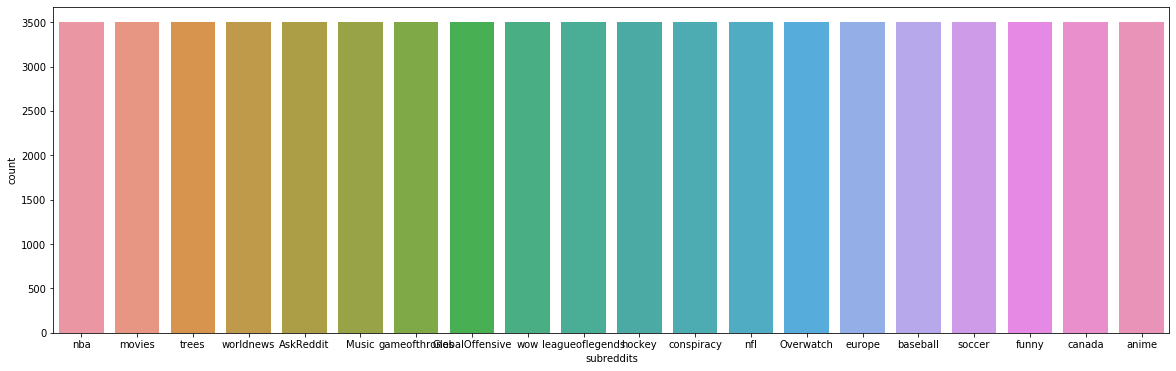

In [3]:
dims = (20, 6)
fig= plt.subplots(figsize=dims)
sb.countplot(x= 'subreddits' ,data=Data)

In [7]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords.add('url')
stopWords.add('user')
print(stopWords)


{'its', "mustn't", 'myself', 'm', "hadn't", 'ours', "weren't", 'very', 'don', 'these', 'my', 'but', 'between', 've', "should've", 'through', "wasn't", 're', 'against', 'more', 'while', 'now', 'most', 'o', "wouldn't", 'there', 'about', 'to', 'that', 'doing', 'will', 'above', 'any', 'yourselves', 'did', 'up', "needn't", 'he', 'if', 'your', 'in', 'or', 'because', 'having', "don't", "mightn't", 'd', 'shouldn', 'it', 'are', 'again', 'y', 'who', 'being', 'is', "doesn't", 'few', 'him', 'hers', 'their', 'me', 'what', 'was', 'themselves', 'does', 'has', 'by', 'below', 'aren', 'isn', 'with', 'you', 'here', 'both', "isn't", 'off', 'when', 'user', 'too', 'further', 'ain', 'nor', 'of', 'hasn', "haven't", 'an', 'those', 'were', 'into', "couldn't", 'couldn', "won't", 'can', 'during', 'just', 'she', "shouldn't", 'we', 'why', 's', 'i', "that'll", 'should', 'out', 'no', 'himself', "you've", 'they', "you'd", 'until', 'do', "shan't", 'this', 'needn', 'am', 'how', "hasn't", 'ourselves', 'won', 'each', 'at'

In [8]:
from sklearn import preprocessing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)
#This lemmatization part is inspired by 'Lemmatize whole sentences with Python and nltk’s WordNetLemmatizer' see reference.
  

enc = preprocessing.LabelEncoder()

enc.fit(["nba","hockey","leagueoflegends","soccer","funny","movies","anime","Overwatch","trees","GlobalOffensive","nfl","AskReddit",
         "gameofthrones","conspiracy","worldnews","Music","wow","europe","canada","baseball"])



Data['comments']=Data['comments'].replace(to_replace=r'((www\.[^\s]+)|(https?://[^\s]+))', value='url', regex=True)
Data['comments']=Data['comments'].replace(to_replace=r'@[^\s]+', value='user', regex=True)
Data['comments']=Data.apply(lambda row: lemmatize_sentence(row['comments']), axis=1)


X_train= Data['comments']
y_train= enc.transform(Data['subreddits'])
X_test= Test['comments']





In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=stopWords, ngram_range=(1, 3))
 

Xtrain=vec.fit_transform(X_train)
Xtest= vec.transform(X_test)

D:\ana\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['at_user', 'url'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [243]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
XtrainSVD=svd.fit_transform(Xtrain)
XtestSVD=svd.transform(Xtest)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
binaryVec = CountVectorizer(stop_words=stopWords,ngram_range=(1,3),binary=True)
XtrainBin=binaryVec.fit_transform(X_train)
XtestBin=binaryVec.transform(X_test)

<70000x2228310 sparse matrix of type '<class 'numpy.float64'>'
	with 4117636 stored elements in Compressed Sparse Row format>